## Import packages for analysis

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

# Uppgift 1 - uppvärmning covid-19 data

a) Gör initial dataanalys för att snabbt få en överblick över datasetet. Använd metoder som ex. info(),
describe(), value_counts(), head(), columns, index för att snabbt få en överblick.


In [216]:
# Load in and look over the dataset:

covid19 = pd.read_excel("Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Riket")
# covid19.describe()
# covid19.info()
# covid19.value_counts()
covid19.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


b) Slå ihop kolumnerna "år" och "veckonummer" till en kolumn med namn "Vecka" med följande format:


In [217]:
covid19 = covid19.astype({"veckonummer": str, "år": str})
covid19["Vecka"] = covid19["år"] + "v" + covid19["veckonummer"]
covid19_vecka = pd.DataFrame(covid19.iloc[: , 13])
covid19


,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv,Vecka
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.000000,2020v6
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.000000,2020v7
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.000000,2020v8
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.000000,2020v9
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.000000,2020v10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2021,37,6266,60,137,1145764,11039,24,7823,52,5.0,14807,1426.599976,2021v37
85,2021,38,4298,41,101,1150062,11080,21,7844,40,3.9,14847,1430.400024,2021v38
86,2021,39,4241,41,82,1154303,11121,17,7861,37,3.6,14884,1434.000000,2021v39
87,2021,40,4141,40,81,1158444,11161,15,7876,42,4.0,14926,1438.099976,2021v40


För deluppgifterna c-f, använd både Seaborn och Plotly express. För Seaborn, använd subplots så du får 2x2
grid med graferna.

- c) Rita en linjediagram som visar avlidna fall per vecka från 2020v6 till nu



Text(0, 0.5, 'Number of deaths')

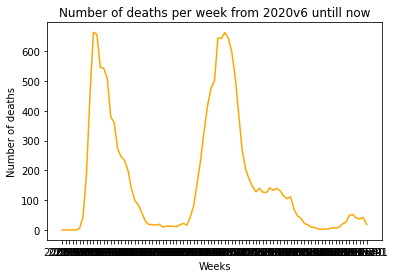

In [257]:
sns.lineplot(data = covid19, x = "Vecka", y = "Antal_avlidna_vecka", color = "orange").set_title("Number of deaths per week from 2020v6 untill now")
plt.xlabel("Weeks")
plt.ylabel("Number of deaths")


- d) Rita en linjediagram som visar nya fall per vecka från 2020v6 till nu.

Text(0, 0.5, 'Number of new falls')

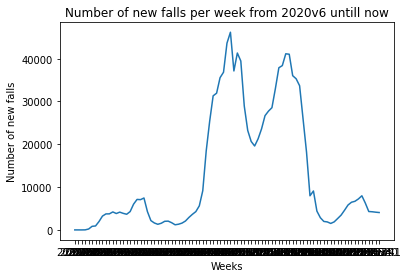

In [231]:
sns.lineplot(data = covid19, x = "Vecka", y = "Antal_fall_vecka").set_title("Number of new falls per week from 2020v6 untill now")
plt.xlabel("Weeks")
plt.ylabel("Number of new falls")


- e) Rita linjediagram av både avlidna fall per vecka och nya fall per vecka i samma fönster från 2020v6 till nu.


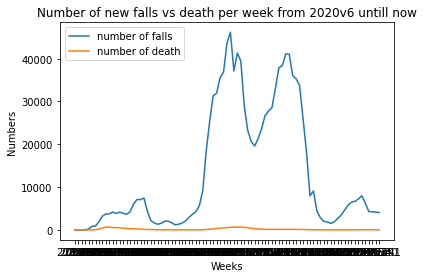

In [247]:
sns.lineplot(data = covid19, x = "Vecka", y = "Antal_fall_vecka")
sns.lineplot(data = covid19, x = "Vecka", y = "Antal_avlidna_vecka").set_title("Number of new falls vs death per week from 2020v6 untill now")
plt.xlabel("Weeks")
plt.ylabel("Numbers")
plt.legend(labels=['number of falls', 'number of death'])

- f) Rita linjediagram av kumulativt antal fall från 2020v6 till nu.

Text(0, 0.5, 'Number of cumulative falls')

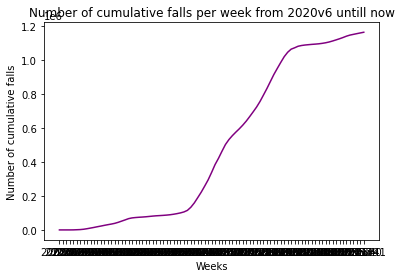

In [258]:
sns.lineplot(data = covid19, x = "Vecka", y = "Kum_antal_fall", color = "purple").set_title("Number of cumulative falls per week from 2020v6 untill now")
plt.xlabel("Weeks")
plt.ylabel("Number of cumulative falls")